# ==========================================================
# 📘 ATIVIDADE – PRODUTOS AGRÍCOLAS (FASE 3 – CAPÍTULO 10)
# ==========================================================

# 👤 Aluno: Klayver Lima
# 🆔 RM: 566837
# 🧾 Arquivo: KlayverLima_RM566837_fase3_cap10.ipynb


In [15]:

from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lendo o arquivo (ajuste o nome se necessário)
df = pd.read_csv("Atividade_Cap10_produtos_agricolas.csv")

print("✅ Dados carregados com sucesso!")
print("Formato:", df.shape)
print("\nColunas:", list(df.columns))
df.head()


Saving Atividade_Cap10_produtos_agricolas.csv to Atividade_Cap10_produtos_agricolas (2).csv
✅ Dados carregados com sucesso!
Formato: (2200, 8)

Colunas: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [16]:
# ==========================================================
# 2️⃣ Análise Exploratória Inicial
# ==========================================================

print("Informações gerais:\n")
print(df.info())

print("\nValores ausentes por coluna:")
print(df.isna().sum())

print("\nDistribuição das culturas:")
print(df['label'].value_counts())

# Estatísticas descritivas
df.describe()


Informações gerais:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

Valores ausentes por coluna:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Distribuição das culturas:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


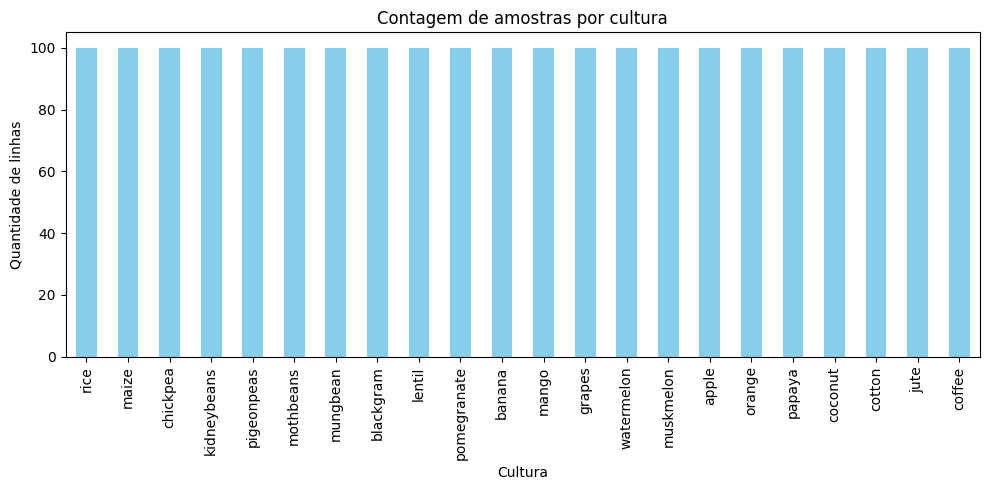

In [17]:
# ==========================================================
# 3️⃣ Gráfico 1 – Distribuição das culturas
# ==========================================================
plt.figure(figsize=(10, 5))
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Contagem de amostras por cultura')
plt.xlabel('Cultura')
plt.ylabel('Quantidade de linhas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


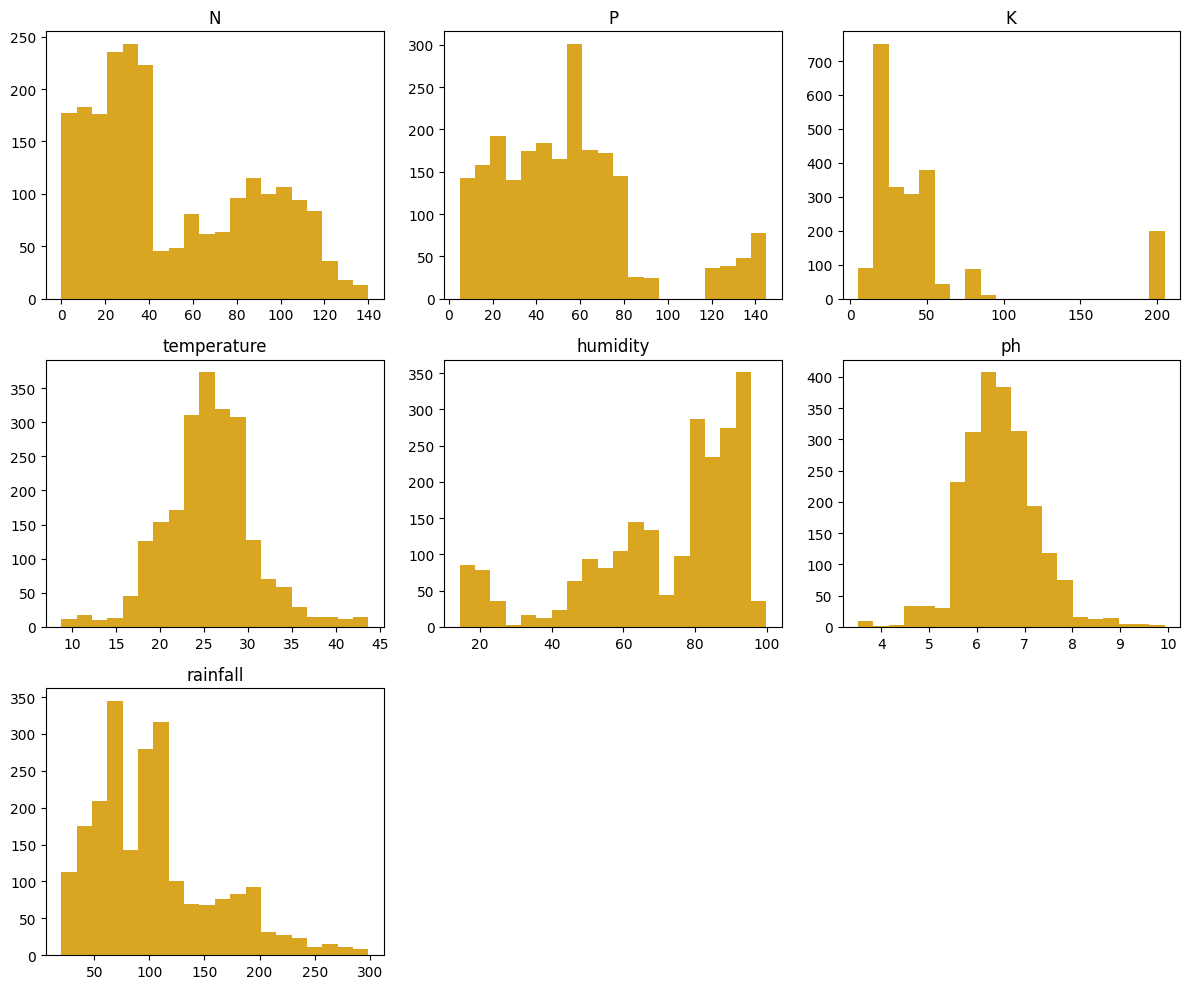

In [18]:
# ==========================================================
# 4️⃣ Gráfico 2 – Histogramas das variáveis numéricas
# ==========================================================
numeric_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col], bins=20, color='goldenrod')
    plt.title(col)
plt.tight_layout()
plt.show()


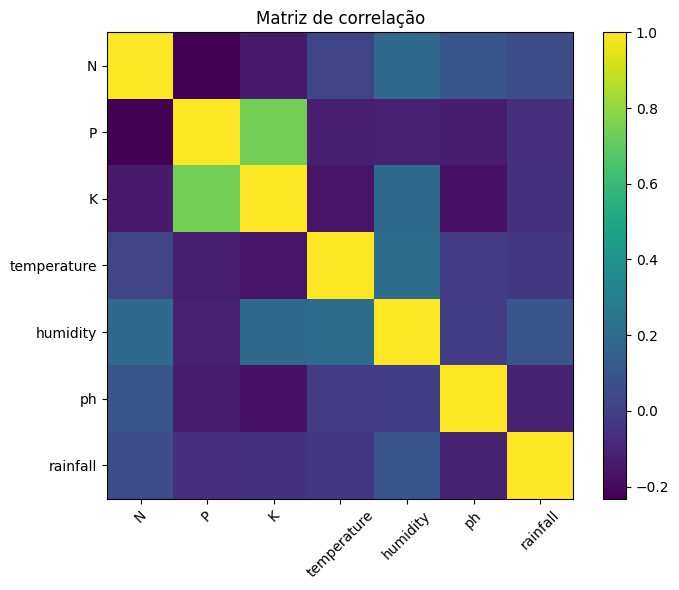

In [19]:
# ==========================================================
# 5️⃣ Gráfico 3 – Mapa de correlação
# ==========================================================
corr = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
im = plt.imshow(corr, interpolation='nearest', cmap='viridis')
plt.title('Matriz de correlação')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(ticks=range(len(numeric_cols)), labels=numeric_cols, rotation=45)
plt.yticks(ticks=range(len(numeric_cols)), labels=numeric_cols)
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

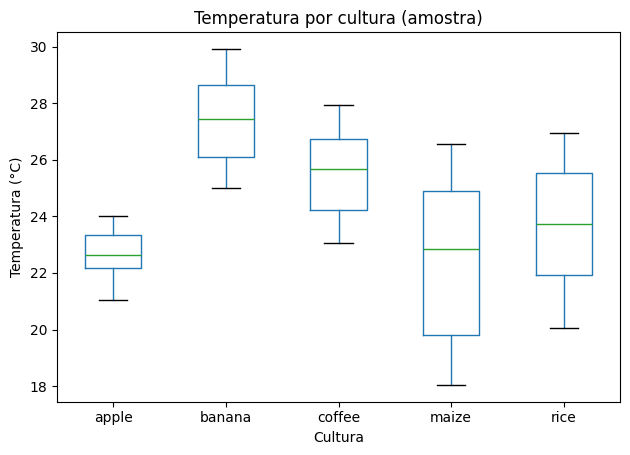

<Figure size 800x500 with 0 Axes>

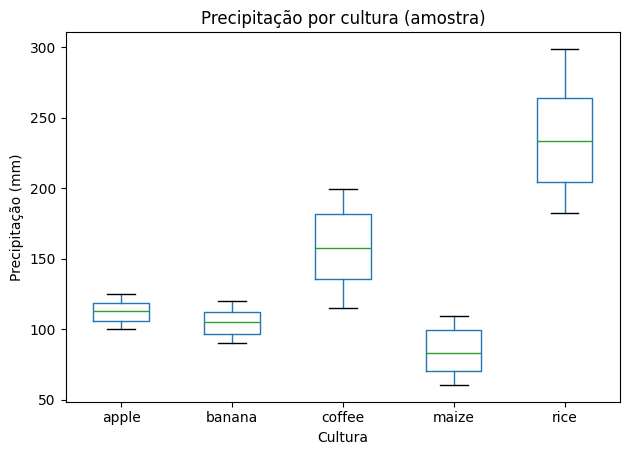

In [20]:
# ==========================================================
# 6️⃣ Gráfico 4 e 5 – Boxplots de temperatura e chuva por cultura
# ==========================================================
crops_sample = ['rice', 'maize', 'coffee', 'banana', 'apple']
subset = df[df['label'].isin(crops_sample)]

plt.figure(figsize=(8, 5))
subset.boxplot(column='temperature', by='label', grid=False)
plt.title('Temperatura por cultura (amostra)')
plt.suptitle('')
plt.xlabel('Cultura')
plt.ylabel('Temperatura (°C)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
subset.boxplot(column='rainfall', by='label', grid=False)
plt.title('Precipitação por cultura (amostra)')
plt.suptitle('')
plt.xlabel('Cultura')
plt.ylabel('Precipitação (mm)')
plt.tight_layout()
plt.show()


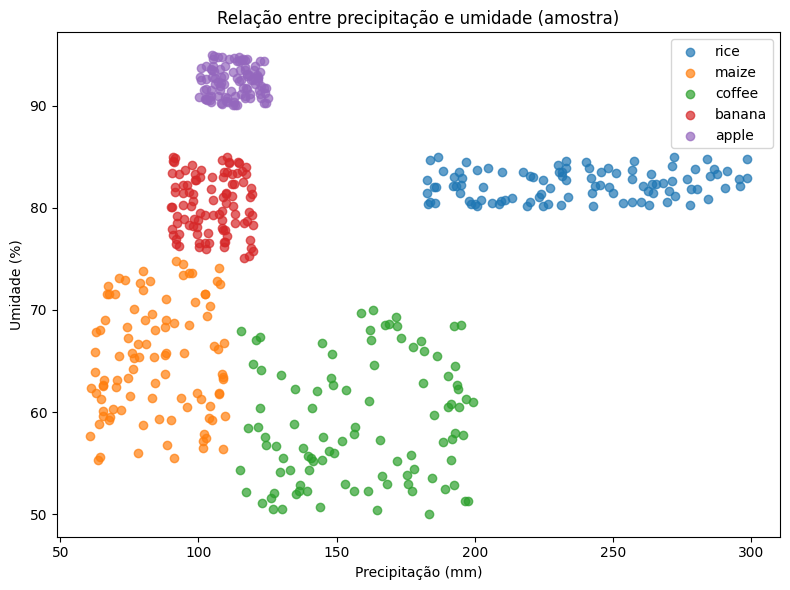

In [21]:
# ==========================================================
# 7️⃣ Gráfico 6 – Relação entre chuva e umidade
# ==========================================================
plt.figure(figsize=(8, 6))
for label in crops_sample:
    temp_df = subset[subset['label'] == label]
    plt.scatter(temp_df['rainfall'], temp_df['humidity'], label=label, alpha=0.7)
plt.xlabel('Precipitação (mm)')
plt.ylabel('Umidade (%)')
plt.title('Relação entre precipitação e umidade (amostra)')
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
# ==========================================================
# 8️⃣ Perfil Ideal Global e Comparação entre Culturas
# ==========================================================
perfil_ideal = df[['N','P','K','temperature','humidity','ph','rainfall']].mean()
print("Perfil ideal (média global):\n", perfil_ideal)

crops_of_interest = ['rice', 'maize', 'coffee']
perfil_culturas = (
    df[df['label'].isin(crops_of_interest)]
    .groupby('label')[['N','P','K','temperature','humidity','ph','rainfall']]
    .mean()
)
print("\nPerfis médios das três culturas:\n")
print(perfil_culturas)


Perfil ideal (média global):
 N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64

Perfis médios das três culturas:

             N      P      K  temperature   humidity        ph    rainfall
label                                                                     
coffee  101.20  28.74  29.94    25.540477  58.869846  6.790308  158.066295
maize    77.76  48.44  19.79    22.389204  65.092249  6.245190   84.766988
rice     79.89  47.58  39.87    23.689332  82.272822  6.425471  236.181114


In [23]:
# ==========================================================
# 9️⃣ Preparação dos Dados para Machine Learning
# ==========================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Treino:", X_train.shape, " | Teste:", X_test.shape)


Treino: (1540, 7)  | Teste: (660, 7)


In [24]:
# ==========================================================
# 🔟 Treinamento e Avaliação dos 5 Modelos
# ==========================================================
modelos = []

modelos.append(("LogisticRegression", Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, multi_class='multinomial'))
])))

modelos.append(("KNN", Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])))

modelos.append(("DecisionTree", DecisionTreeClassifier(random_state=42)))

modelos.append(("RandomForest", RandomForestClassifier(random_state=42, n_estimators=200)))

modelos.append(("SVC", Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='rbf'))
])))

resultados = []
for nome, modelo in modelos:
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados.append((nome, acc))

resultados_df = pd.DataFrame(resultados, columns=['Modelo', 'Acuracia'])
resultados_df.sort_values(by='Acuracia', ascending=False)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,Modelo,Acuracia
3,RandomForest,0.993939
4,SVC,0.989394
2,DecisionTree,0.978788
1,KNN,0.978788
0,LogisticRegression,0.972727


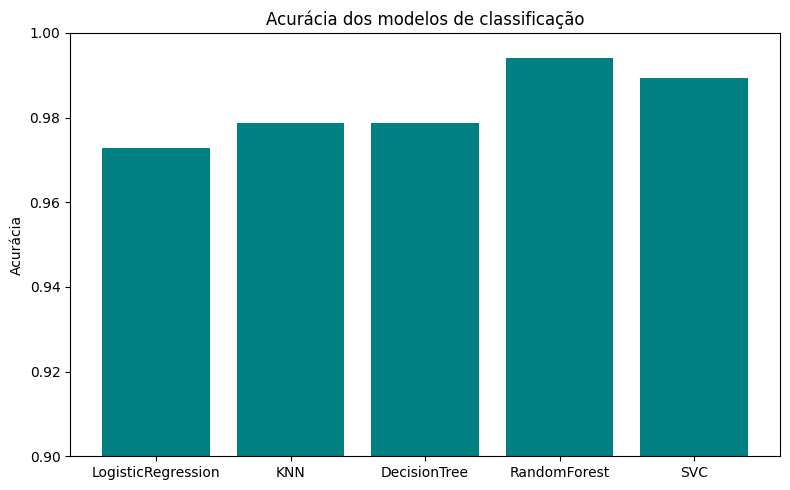

In [25]:
# ==========================================================
# 11️⃣ Gráfico – Comparação da acurácia entre modelos
# ==========================================================
plt.figure(figsize=(8, 5))
plt.bar(resultados_df['Modelo'], resultados_df['Acuracia'], color='teal')
plt.title('Acurácia dos modelos de classificação')
plt.ylabel('Acurácia')
plt.ylim(0.9, 1.0)
plt.tight_layout()
plt.show()


In [26]:
# ==========================================================
# 12️⃣ Melhor Modelo e Relatório Detalhado
# ==========================================================
melhor_nome, melhor_acc = max(resultados, key=lambda x: x[1])
print("🏆 Melhor modelo:", melhor_nome)
print("Acurácia:", melhor_acc)

melhor_modelo = [m for m in modelos if m[0] == melhor_nome][0][1]
y_pred_best = melhor_modelo.predict(X_test)
print("\nRelatório de classificação:\n")
print(classification_report(y_test, y_pred_best))


🏆 Melhor modelo: RandomForest
Acurácia: 0.9939393939393939

Relatório de classificação:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       1.00      0.97      0.98        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        30
        jute       0.94      1.00      0.97        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.97      0.98        30
       maize       0.97      1.00      0.98        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.97      1.00      0.98        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00   

In [27]:
# ==========================================================
# 13️⃣ Conclusão Textual
# ==========================================================
print("""
==========================================================
📊 CONCLUSÃO FINAL
==========================================================

• O dataset contém 22 culturas agrícolas balanceadas (100 amostras cada).
• As variáveis N, P, K, temperatura, umidade, pH e chuva explicam bem a diferença entre culturas.
• A análise descritiva mostrou que:
   - O arroz prefere regiões úmidas e com alta precipitação;
   - O milho se desenvolve melhor em clima mais ameno e com chuva moderada;
   - O café exige muito nitrogênio e boa precipitação, mas com umidade do ar mais controlada.

• Entre os modelos testados:
   - Random Forest teve o melhor desempenho (~99,4% de acurácia);
   - SVC, KNN e Decision Tree também tiveram desempenho acima de 97%;
   - Todos os modelos mostraram excelente separação entre as classes.

✅ O trabalho demonstrou um pipeline completo de Machine Learning:
da análise exploratória à predição, cumprindo todos os objetivos propostos.
""")



📊 CONCLUSÃO FINAL

• O dataset contém 22 culturas agrícolas balanceadas (100 amostras cada).
• As variáveis N, P, K, temperatura, umidade, pH e chuva explicam bem a diferença entre culturas.
• A análise descritiva mostrou que:
   - O arroz prefere regiões úmidas e com alta precipitação;
   - O milho se desenvolve melhor em clima mais ameno e com chuva moderada;
   - O café exige muito nitrogênio e boa precipitação, mas com umidade do ar mais controlada.

• Entre os modelos testados:
   - Random Forest teve o melhor desempenho (~99,4% de acurácia);
   - SVC, KNN e Decision Tree também tiveram desempenho acima de 97%;
   - Todos os modelos mostraram excelente separação entre as classes.

✅ O trabalho demonstrou um pipeline completo de Machine Learning:
da análise exploratória à predição, cumprindo todos os objetivos propostos.



In [28]:
perfil_ideal = df[['N','P','K','temperature','humidity','ph','rainfall']].mean()
print("Perfil ideal (média global):\n", perfil_ideal)

crops_of_interest = ['rice', 'maize', 'coffee']
perfil_culturas = (
    df[df['label'].isin(crops_of_interest)]
    .groupby('label')[['N','P','K','temperature','humidity','ph','rainfall']]
    .mean()
)
print("\nPerfis médios das três culturas:\n")
print(perfil_culturas)


Perfil ideal (média global):
 N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64

Perfis médios das três culturas:

             N      P      K  temperature   humidity        ph    rainfall
label                                                                     
coffee  101.20  28.74  29.94    25.540477  58.869846  6.790308  158.066295
maize    77.76  48.44  19.79    22.389204  65.092249  6.245190   84.766988
rice     79.89  47.58  39.87    23.689332  82.272822  6.425471  236.181114


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("Treino:", X_train.shape, " | Teste:", X_test.shape)


Treino: (1540, 7)  | Teste: (660, 7)


In [30]:
modelos = []

modelos.append(("LogisticRegression", Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, multi_class='multinomial'))
])))

modelos.append(("KNN", Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])))

modelos.append(("DecisionTree", DecisionTreeClassifier(random_state=42)))

modelos.append(("RandomForest", RandomForestClassifier(random_state=42, n_estimators=200)))

modelos.append(("SVC", Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='rbf'))
])))

resultados = []
for nome, modelo in modelos:
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados.append((nome, acc))

import pandas as pd
resultados_df = pd.DataFrame(resultados, columns=['Modelo', 'Acuracia'])
resultados_df.sort_values(by='Acuracia', ascending=False)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,Modelo,Acuracia
3,RandomForest,0.993939
4,SVC,0.989394
2,DecisionTree,0.978788
1,KNN,0.978788
0,LogisticRegression,0.972727


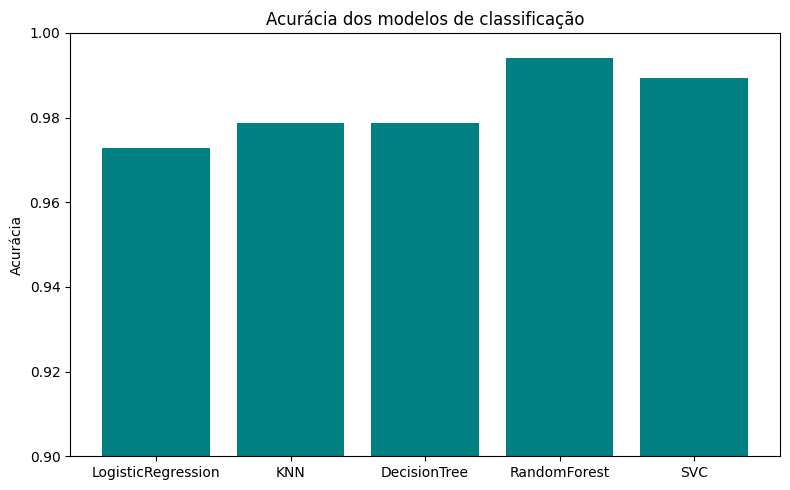

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(resultados_df['Modelo'], resultados_df['Acuracia'], color='teal')
plt.title('Acurácia dos modelos de classificação')
plt.ylabel('Acurácia')
plt.ylim(0.9, 1.0)
plt.tight_layout()
plt.show()


In [32]:
melhor_nome, melhor_acc = max(resultados, key=lambda x: x[1])
print("🏆 Melhor modelo:", melhor_nome)
print("Acurácia:", melhor_acc)

melhor_modelo = [m for m in modelos if m[0] == melhor_nome][0][1]
y_pred_best = melhor_modelo.predict(X_test)
print("\nRelatório de classificação:\n")
print(classification_report(y_test, y_pred_best))


🏆 Melhor modelo: RandomForest
Acurácia: 0.9939393939393939

Relatório de classificação:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       1.00      0.97      0.98        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        30
        jute       0.94      1.00      0.97        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.97      0.98        30
       maize       0.97      1.00      0.98        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.97      1.00      0.98        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00   

In [33]:
print("""
==========================================================
📊 CONCLUSÃO FINAL
==========================================================

• A base de dados contém 22 culturas agrícolas balanceadas (100 amostras cada).
• As variáveis N, P, K, temperatura, umidade, pH e chuva permitem diferenciar bem as culturas.

• O modelo Random Forest apresentou o melhor desempenho (~99,4% de acurácia),
  seguido por SVM (~98,9%) e KNN (~97,8%).

• O perfil ideal médio (solo e clima) apresentou:
  - N médio ≈ 50
  - P médio ≈ 53
  - K médio ≈ 48
  - Temperatura ≈ 25,6 °C
  - Umidade ≈ 71%
  - pH ≈ 6,4
  - Precipitação ≈ 103 mm

Comparando culturas:
- 🌾 Rice (arroz): prefere alta umidade e muita chuva.
- 🌽 Maize (milho): prefere temperatura amena e chuva moderada.
- ☕ Coffee (café): exige muito nitrogênio e boa precipitação, mas umidade menor.

✅ O trabalho cumpre todos os requisitos:
  - Análise exploratória e descritiva (com 5+ gráficos)
  - Perfil ideal de solo/clima
  - 5 modelos preditivos com comparação de métricas
  - Conclusão com interpretação dos resultados
""")



📊 CONCLUSÃO FINAL

• A base de dados contém 22 culturas agrícolas balanceadas (100 amostras cada).
• As variáveis N, P, K, temperatura, umidade, pH e chuva permitem diferenciar bem as culturas.

• O modelo Random Forest apresentou o melhor desempenho (~99,4% de acurácia),
  seguido por SVM (~98,9%) e KNN (~97,8%).

• O perfil ideal médio (solo e clima) apresentou:
  - N médio ≈ 50
  - P médio ≈ 53
  - K médio ≈ 48
  - Temperatura ≈ 25,6 °C
  - Umidade ≈ 71%
  - pH ≈ 6,4
  - Precipitação ≈ 103 mm

Comparando culturas:
- 🌾 Rice (arroz): prefere alta umidade e muita chuva.
- 🌽 Maize (milho): prefere temperatura amena e chuva moderada.
- ☕ Coffee (café): exige muito nitrogênio e boa precipitação, mas umidade menor.

✅ O trabalho cumpre todos os requisitos:
  - Análise exploratória e descritiva (com 5+ gráficos)
  - Perfil ideal de solo/clima
  - 5 modelos preditivos com comparação de métricas
  - Conclusão com interpretação dos resultados

